In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

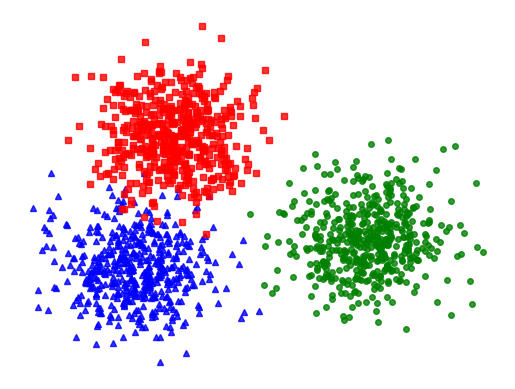

In [4]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

display(X[0:, :], original_label)

In [5]:
X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)
Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)
X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


In [6]:
def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    
    return np.argsort(array_D)[:k]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

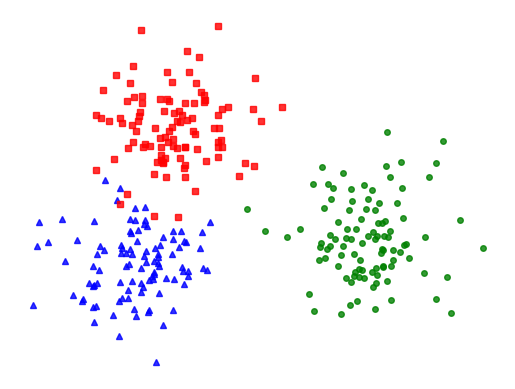

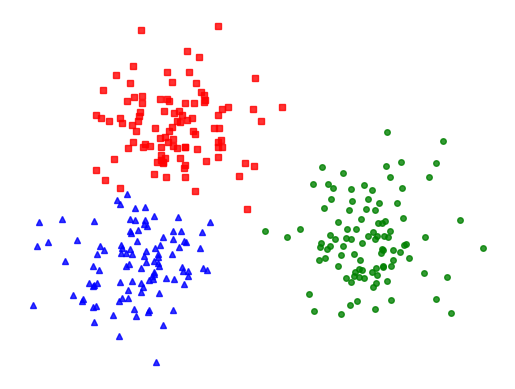

In [7]:
K = 20
y_pred = np.zeros(len(Y_val)).astype(int)

for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(Y_train[indexes[i] ])
    
    y_pred[j] = highest_rank(y_nearest)

print(y_pred)
print(Y_val)

display(X_val.T, Y_val)
display(X_val.T, y_pred)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(Y_val, y_pred))

0.9766666666666667


In [9]:
print(confusion_matrix(Y_val, y_pred))

[[98  0  2]
 [ 0 99  1]
 [ 4  0 96]]
